In [29]:
import os, pathlib, laspy, shutil, io

input_folder  = r"N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las"
output_folder = r"N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean"

file_list = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.las')]
display(f'found {len(file_list)} files ')
display(file_list)


'found 202 files '

['N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240606T164030_172801.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240606T173552_173941.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240606T173948_174334.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240606T174530_174932.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240606T174959_175011.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240607T111312_111855.las',
 'N:\\response\\Restricted_Airborne\\Q680_lidar\\Alaska_2024_Perma-X\\02_processed\\product-als\\las\\FULL_ALS_L1B_20240607T112108_11242

Repairing LAS/LAZ:   0%|          | 1/202 [03:33<11:54:09, 213.18s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240606T164030_172801.las


Repairing LAS/LAZ:   1%|          | 2/202 [03:53<5:32:59, 99.90s/file]  

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240606T173552_173941.las


Repairing LAS/LAZ:   1%|▏         | 3/202 [04:22<3:44:13, 67.61s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240606T173948_174334.las


Repairing LAS/LAZ:   2%|▏         | 4/202 [04:55<2:56:50, 53.59s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240606T174530_174932.las


Repairing LAS/LAZ:   2%|▏         | 5/202 [04:56<1:54:04, 34.75s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240606T174959_175011.las


Repairing LAS/LAZ:   3%|▎         | 6/202 [05:45<2:09:30, 39.65s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T111312_111855.las


Repairing LAS/LAZ:   3%|▎         | 7/202 [06:04<1:47:15, 33.00s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T112108_112420.las


Repairing LAS/LAZ:   4%|▍         | 8/202 [06:20<1:28:49, 27.47s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T113440_113749.las


Repairing LAS/LAZ:   4%|▍         | 9/202 [06:29<1:10:10, 21.81s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T115509_115629.las


Repairing LAS/LAZ:   5%|▍         | 10/202 [08:08<2:25:45, 45.55s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T115637_121433.las


Repairing LAS/LAZ:   5%|▌         | 11/202 [10:00<3:29:32, 65.83s/file]

✔ fixed → N:\response\Restricted_Airborne\Q680_lidar\Alaska_2024_Perma-X\02_processed\product-als\las_clean\FULL_ALS_L1B_20240607T121510_125049.las


Repairing LAS/LAZ:   5%|▌         | 11/202 [10:11<2:56:52, 55.56s/file]


KeyboardInterrupt: 

EPSG:4326


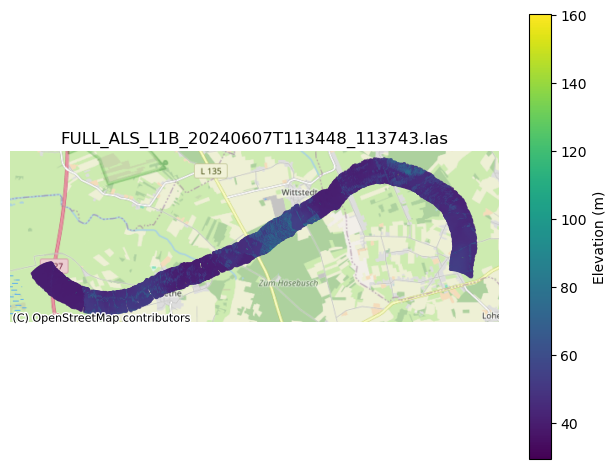

In [21]:
import laspy
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
from pathlib import Path
import contextily as cx          # pip install contextily
from pyproj import CRS

def plot_las_file(file_path, every_nth=1000):

    las  = laspy.read(file_path)
    xyz  = las.xyz[::every_nth]          
    x, y, z = xyz.T                      


    crs_las = las.header.parse_crs()     
    print(crs_las)


    gdf_pts  = gpd.GeoDataFrame({"elev": z}, geometry=gpd.points_from_xy(x, y), crs=crs_las)

    xmin, ymin, _ = las.header.mins
    xmax, ymax, _ = las.header.maxs

    gdf_pts_web  = gdf_pts.to_crs(epsg=3857)
    #gdf_bbox_web = gdf_bbox.to_crs(epsg=3857)

    fig, ax = plt.subplots()


    gdf_pts_web.plot(ax=ax, column="elev", markersize=2, cmap="viridis", alpha=0.6, legend=True, legend_kwds={"label": "Elevation (m)"})

    #gdf_bbox_web.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="Bounding box")

    cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

    ax.set_axis_off()
    ax.set_title(Path(file_path).name, fontsize=12)
    plt.tight_layout()
    plt.show()

#
path = r"P:\cstadie\FULL_ALS_L1B_20240607T113448_113743.las"
plot_las_file(path, every_nth=2_000)   # show 1 point out of 2 000


In [28]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

def get_bounds_record(gpkg_path: str) -> dict:
    """Return one row (as a dict) with the bounding box of a GeoPackage file."""
    gdf = gpd.read_file(gpkg_path)          # read every layer; add layer=… if needed
    xmin, ymin, xmax, ymax = gdf.total_bounds
    return {
        "xmin": xmin.round(3),  # round to 3 decimal places
        "ymin": ymin.round(3),
        "xmax": xmax.round(3),
        "ymax": ymax.round(3),
        "gdf_name": Path(gpkg_path).stem    # file name without extension
    }

# ------------------------------------------------------------------------
data_dir = r"N:\isipd\projects\p_planetdw\data\lidar\aoi"
file_list = [str(Path(data_dir, f)) for f in os.listdir(data_dir) if f.endswith(".gpkg")]

records = [get_bounds_record(fp) for fp in file_list]  # build a list of dicts
bounds_of_TA = pd.DataFrame.from_records(records)      # one shot → DataFrame

display(bounds_of_TA)          # Jupyter helper; or print(bounds_of_TA)


,xmin,ymin,xmax,ymax,gdf_name
0,-135.125,68.191,-134.946,68.276,WC_Aklavik_20230715_15cm_01
1,-133.551,68.010,-133.445,68.126,WC_DempsterHW01_20230709_15cm_01
2,-133.664,67.901,-133.417,67.919,WC_DempsterHW02_20230709_15cm_01
3,-133.706,67.791,-133.395,67.873,WC_DempsterHW03_20230709_15cm_01
4,-134.405,68.899,-134.266,68.951,WC_FireEV029_20230721_15cm_01
5,-139.219,69.529,-138.832,69.601,WC_HerschelIsland_20230721_15cm_01
6,-133.834,68.313,-133.618,68.409,WC_Inuvik_20230705_15cm_01
7,-133.313,68.950,-133.240,69.065,WC_ITHGrid01_20230721_15cm_01
8,-133.589,68.939,-133.265,68.973,WC_ITHGrid02_20230712_15cm_01
9,-133.183,69.070,-132.957,69.159,WC_ITHGrid03_20230711_15cm_01
